In [5]:
import shap
import numpy as np
import torch
from shap_exp import ShapExp

In [6]:
from matplotlib import pyplot as plt
import sys
sys.path.append('E:/Projects/XAI/BHEM')
from model import Cnn, getClassifier
from dataset import handwriting
from utils import reconstruct_mask, basic_segment, quickshift, slic
torch.manual_seed(0)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
cnn = getClassifier(Cnn, device, f_params='../../MINST.pkl')
# %% Load MINST dataset
mnist = handwriting('mnist_784', normalize=True)
testID = 2
Image = torch.from_numpy(mnist.XCnn[testID]).unsqueeze(0)

In [7]:
from matplotlib import pyplot as plt

In [8]:
segments_slic = slic(Image[0].permute(1,2,0), n_segments=100, compactness=10, sigma=1)
print(segments_slic.shape)
basic_seg = basic_segment(Image)
# %% Shap
# shap_exp = ShapExp(cnn.predict_proba, Images, masker=np.expand_dims(basic_seg.get_mask(), axis=0))
shap_exp = ShapExp(cnn.predict_proba, Image, masker=segments_slic)
print(shap_exp.y_pred, np.argmax(shap_exp.y_pred))
print(shap_exp.test_numpy.shape)

(28, 28)


DimensionError: The passed data does not match the background shape expected by the masker! The data of shape torch.Size([1, 28, 28]) was passed while the masker expected data of shape (28,).

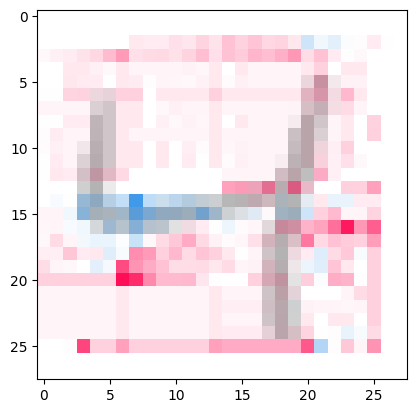

In [ ]:
# shap_exp.plot_shap()
shap_exp.plot_image()